## EMPLOYEE ATTRITION PREDICTION

Here the dataset contains 15000 records with 10 different features. The main theme of this project is to predict the employees who are about to leave the office are the company. Lets's hope at last I come up with the most reliable model that is ideal for this prediction.This helps to increase the management power and the HR team to introduce new techniques to decrease the attrition rate.

The first step in this project goes in importing the required packages and modules.

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score

In [11]:
data = pd.read_csv('Employee_Attrition.csv')


In [12]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
data.loc[0]

satisfaction_level        0.38
last_evaluation           0.53
number_project               2
average_montly_hours       157
time_spend_company           3
Work_accident                0
left                         1
promotion_last_5years        0
Department               sales
salary                     low
Name: 0, dtype: object

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
data["satisfaction_level"].isnull().sum()

np.int64(0)

In [16]:
data["satisfaction_level"] = data["satisfaction_level"].replace(np.nan, data["satisfaction_level"].median())


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [19]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Now,I mention the columns in the dataset and they are:
    
    1.satisfaction_level
    2.last_evaluation
    3.number_of_projects
    4.average_monthly_hours
    5.years_at_company
    6.work_accident
    7.left
    8.promotion_last_5years
    9.department
    10.salary

This dataset consists of 15000 rows and 10 columns.    

In [20]:
data_left_1=data[data['left']==1]

In [21]:
data_left_1.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
data.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

In [23]:
data_left_1.count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
Department               3571
salary                   3571
dtype: int64

## Exploring Data Analysis

This section helps in exploring the data thoroughly.This includes like finding the correlation between the features and the target label,and additional information that is best required for a good prediction.This section helps in knowing how each feature is related to the target and this is done through visualization inorder to depict which feature broadly defines the target label.I used basic implementation which is easily understood by every one even who has a minimum knowlwdge regarding the subject.

In [24]:

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


By observing the above information regarding the entire dataset,we can conclude that:
    
1.On an average,24% of the employees have left the firm which depicts a great loss of talent.

2.On looking at the last evaluation score,it is approximately 71% which is good score but even the left candidates precentage has a higher score which implies that the company is loosing a talented and knowledgeable employees.

In [25]:
data_left_1 = data[data['left']==1]
data_left_1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [26]:
data.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)


By observing the above data exploration of the left employees,we are now up with some more data diving deep into the project-

1.The employees who left the firm have a less satisfaction level.

2.The employees who are left exhibited only marginally better as compared to the other employees in the firm.

3.We can also find two other noticeable points-
   
   1.The both ratio of employees stayed the same duration of time in the firm.
   
   2.They were assigned the same number of projects as everyone else.

Now lets dive deeper into the dataset using visualization techniques.With these techniques we will be able to understand the behaviour of the dataset more broadly and clearly which hepls in better prediction.

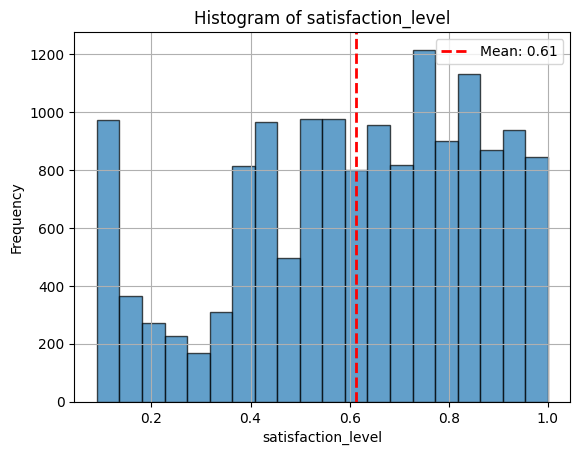

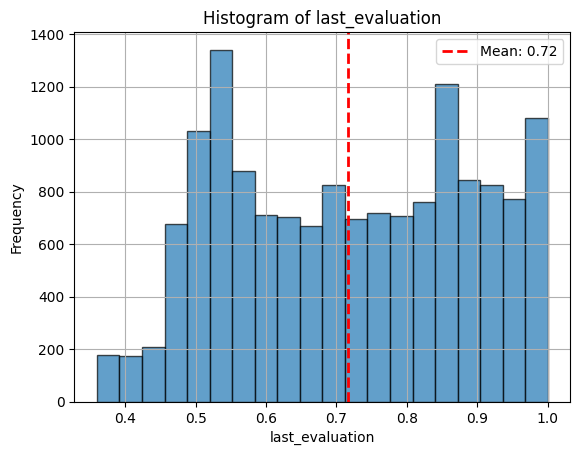

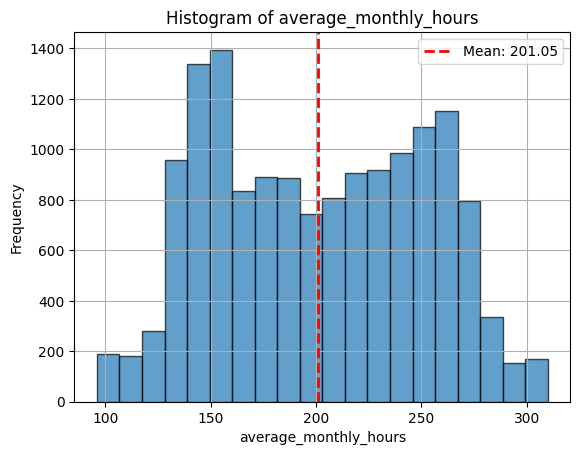

In [27]:
import matplotlib.pyplot as plt

def Histo(data, to_plot):
    for col in to_plot:
        # Drop NaN values to avoid issues with plotting
        values = data[col].dropna()
        
        plt.hist(values, bins=20, edgecolor='black', alpha=0.7)
        plt.axvline(values.mean(), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {values.mean():.2f}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {col}")
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
t_plt = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']

Histo(data, t_plt)


In [28]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Looking at the histograms above,we donot get much clear cut information regarding the features of the dataset.Now,lets move some what deeper to see:

1.To observe the last_evaluation score of the employees  who left and stayed in the firm.

2.To depict the department to which the left employee belongs to.

C:\Users\User\AppData\Local\Temp\ipykernel_11624\456553392.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


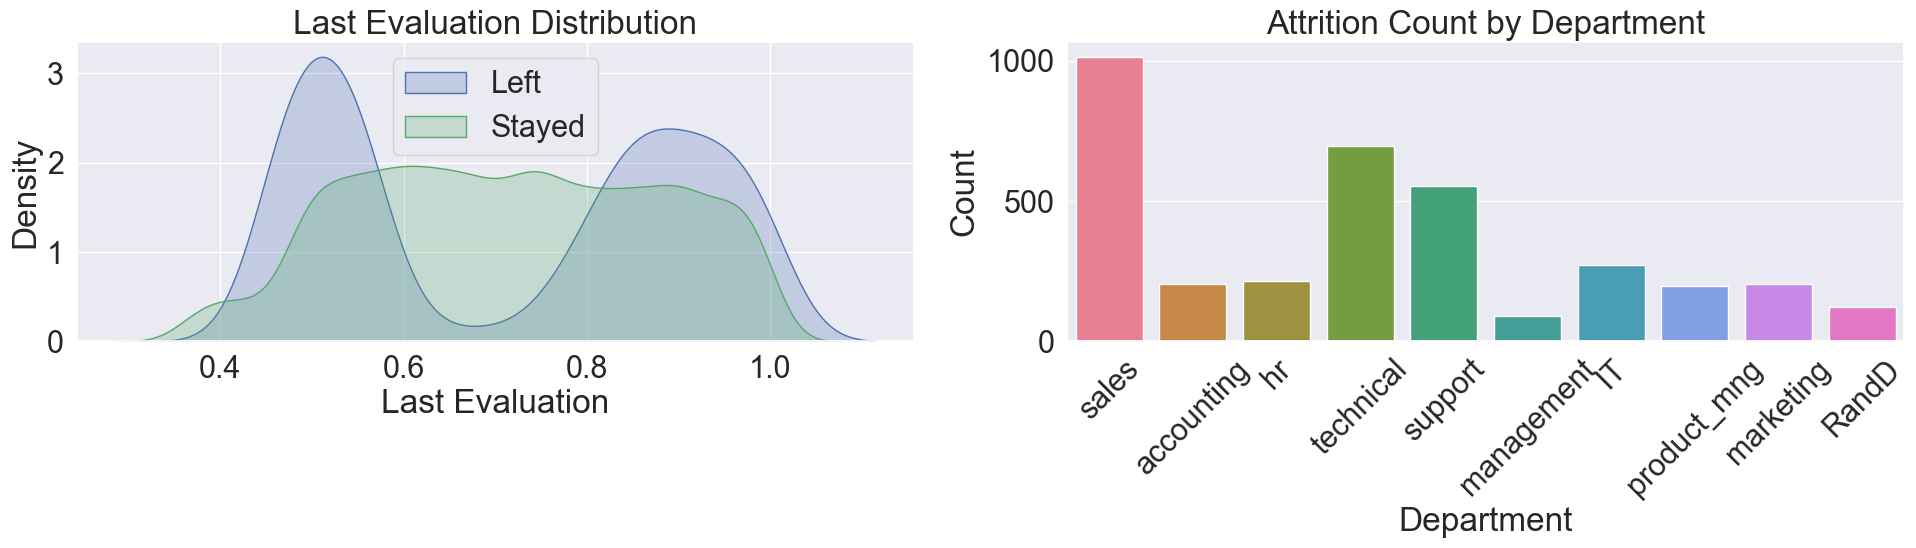

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure these variables are defined
# data = ...               # Full dataset
# data_left_1 = data[data['left'] == 1]  # People who left

sns.set(font_scale=2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# KDE plot: Last evaluation comparison
sns.kdeplot(
    data=data_left_1['last_evaluation'].dropna(),
    color='b',
    ax=axs[0],
    fill=True,
    label='Left'
)
sns.kdeplot(
    data=data[data['left'] == 0]['last_evaluation'].dropna(),
    color='g',
    ax=axs[0],
    fill=True,
    label='Stayed'
)
axs[0].set_xlabel('Last Evaluation')
axs[0].set_title('Last Evaluation Distribution')
axs[0].legend()

# Count plot: Department-wise attrition
departments = data_left_1['Department'].unique()  # Ensure capitalization matches
palette = sns.color_palette("husl", len(departments))
sns.countplot(
    x='Department',
    data=data_left_1,
    ax=axs[1],
    palette=palette
)
axs[1].set_xlabel('Department')
axs[1].set_ylabel('Count')
axs[1].set_title('Attrition Count by Department')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


By careful observation from the above plot(1):

1.The employees who left the firm are almost the ones who show very poor performance in work or the ones who show a very great performance

2.The employees who belong to sales department left the firm the most.

In [30]:
# Mapping dictionary for department names
target_mappers = {
    'sales': 0,
    'accounting': 1,
    'hr': 2,
    'technical': 3,
    'support': 4,
    'management': 5,
    'IT': 6,
    'product_mng': 7,
    'marketing': 8,
    'RandD': 9
}

# Use .map() which is cleaner and handles missing values
data['Department'] = data['Department'].map(target_mappers)

print(data['Department'].unique())


[0 1 2 3 4 5 6 7 8 9]


In [31]:


target_mappers = {'low': 0, 'medium': 1, 'high': 2}

# Use map for cleaner, vectorized operation
data['salary'] = data['salary'].map(target_mappers)

print(data['salary'].unique())

[0 1 2]


Now,its time to check the behaviour of one feature with the other.For doing this,we implement a correlation matrix to depict how each feature is related with the other.

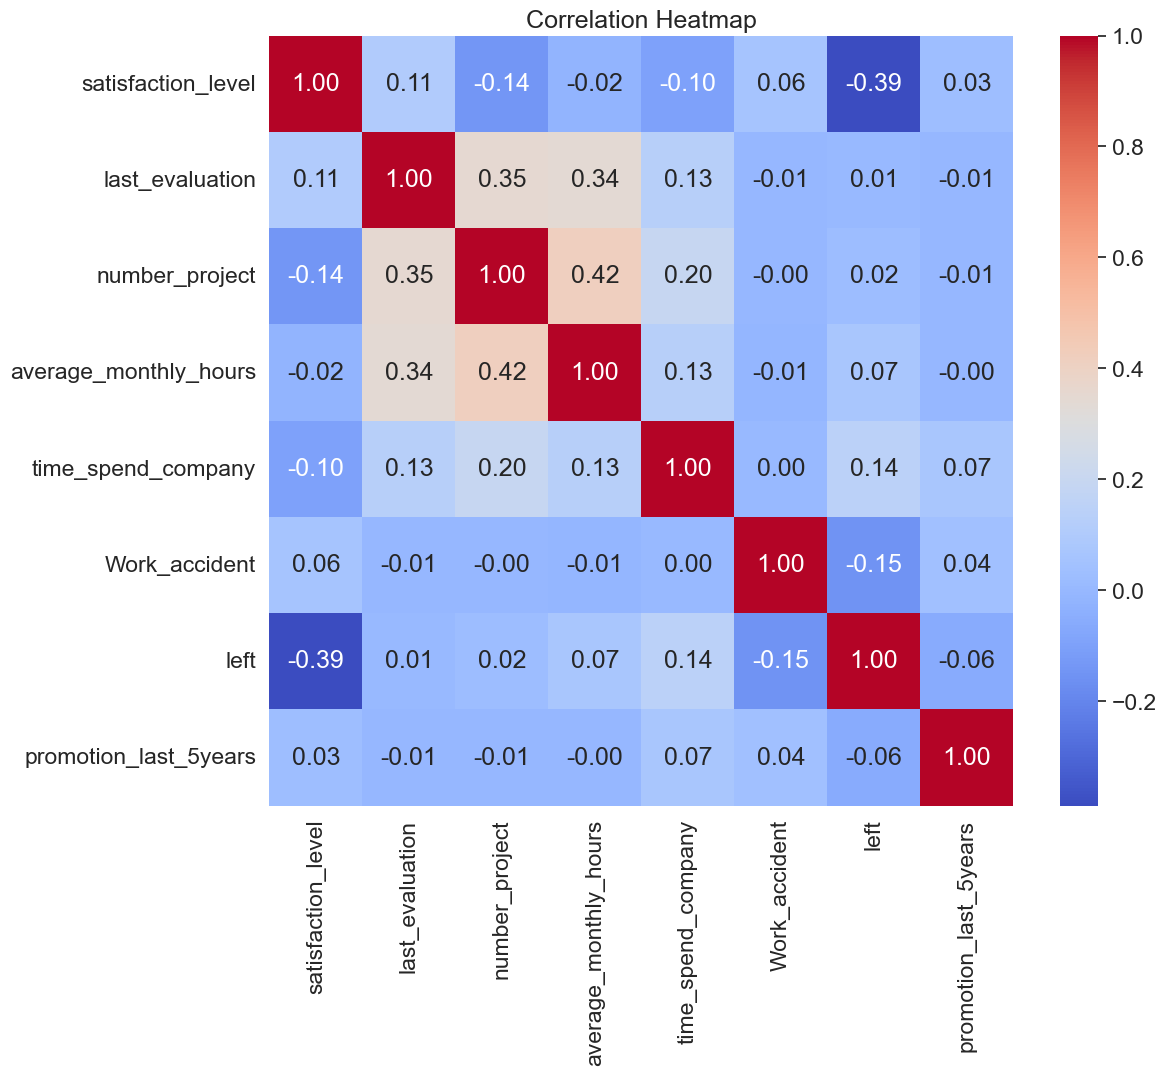

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy to avoid modifying the original
data1 = data.copy()

# Drop categorical columns
columns_to_drop = ['Department', 'salary'] #Case-sensitive fix
data1.drop(columns=columns_to_drop, inplace=True)

# Set Seaborn style
sns.set(font_scale=1.5)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=90)
plt.title("Correlation Heatmap")
plt.show()


In [33]:
data1.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


The correlation matrix results in telling how each feature is related with the other.If the result approaches 1,it tells that the features that achieved one are highly correlated.If the result approaches 0,it tells that the features that achieved 0 are badly correlated

On a whole,by the keen observation at the correlation matrix.we come up with two outcomes-

1.The features 'satisfaction_level' and the 'left' are negatively correlated which implies that there a bad correlation between the two features.

2.Highest correlation is achieved by the features 'number_of_projects' and 'average_monthly_hours' i.e,0.42

3.The next higher correlation is achieved by the features 'number_of_projects' and 'last_evaluation' i.e,0.35

Now lets go deeper regarding the target label.This means we separately understand both the classes in our target label i.e.left=0 or left=1.This helps in proper evaluation of target label.

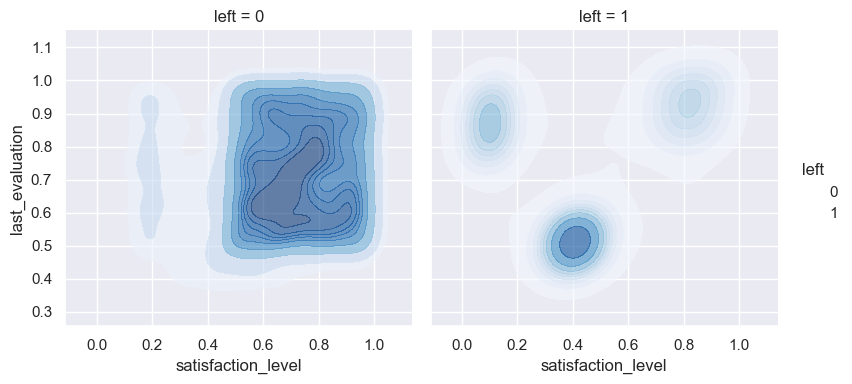

In [34]:


sns.set(color_codes=True)

# Use map_dataframe for multi-variable plots like bivariate kde
plot = sns.FacetGrid(data, col='left', hue='left', sharex=True, sharey=True, height=4)
plot.map_dataframe(sns.kdeplot, x='satisfaction_level', y='last_evaluation', fill=True, cmap='Blues', alpha=0.6)

# Add legend and plot
plot.add_legend()
plt.show()


The above plot helps in clear visualization of the target label.Here Left=0 reveals about the employees who has not left the firm.Left=1 reveals about the employees who has left the firm.Here we can find two clusters in the first face grid and three clusters in the second face grid.

In the first face grid:larger cluster denotes the employess who has higher satisfaction_level and last_evaluation and stays in the firm.


In the second face grid,we deal with three types of issues:(deals with the employees who left the firm)

   1.employees with low satisfaction_level and low last_evaluation score.
   
   2.employees with low satisfaction_level and medium last_evaluation_score.
   
   3.employees with high satisfaction level and high last_evaluation score.
   
The firm experiences a heavier loss due lo lost of third type of employees in the second face grid.i.e the employees with higher satisfaction_level and last_evaluation.   

Now lets plot for this third tier of employees whose lose effects the company a lot.

C:\Users\User\AppData\Local\Temp\ipykernel_11624\284753552.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Department', data=third_low, palette=palette)


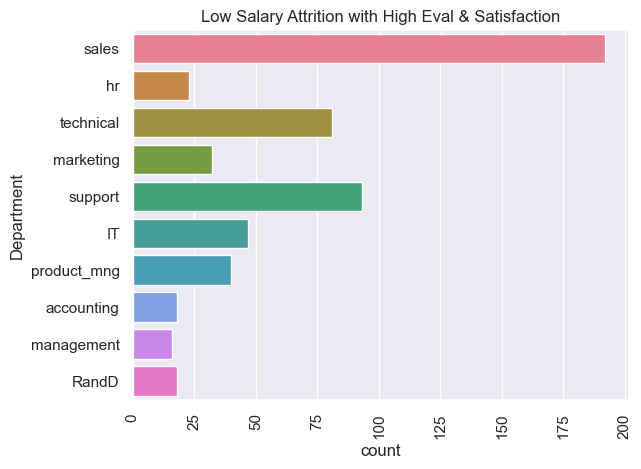

In [35]:



# Step 1: Filter rows in data_left_1 where both conditions are true
third = data_left_1[
    (data_left_1['last_evaluation'] > data['last_evaluation'].mean()) &
    (data_left_1['satisfaction_level'] > data['satisfaction_level'].mean())
]

# Step 2: Filter low salary entries
third_low = third[third['salary'] == 'low']  # if not encoded

# Step 3: Plot department-wise attrition (make sure column name is correct)
departments = third_low['Department'].unique()
palette = sns.color_palette("husl", len(departments))

# Step 4: Countplot
sns.countplot(y='Department', data=third_low, palette=palette)
plt.xticks(rotation=90)
plt.title('Low Salary Attrition with High Eval & Satisfaction')
plt.show()


From the above graph,we conclude that the sales department experienced a higher level of attrition within the third tier of people in the second face grid.

## How well do each department satisfy its employees

Now we look into each department and verify how well do each leader satisfy its employees and maintain the knowledge pool at the same time.

In this we consider only few features that helps in gaining the above mentioned information.

1.satisfaction_level

2.last_evaluation

3.number_of_projects

4.average_monthly_hours

In [36]:
dept = data['Department'].unique()

avgl = []  # satisfaction_level
avge = []  # last_evaluation
avgp = []  # number_project
avgh = []  # average_monthly_hours

for i in dept:
    avgl.append(data['satisfaction_level'][data['Department'] == i].mean())

for i in dept:
    avge.append(data['last_evaluation'][data['Department'] == i].mean())

for i in dept:
    avgp.append(data['number_project'][data['Department'] == i].mean())

for i in dept:
    avgh.append(data['average_monthly_hours'][data['Department'] == i].mean())  # ✅ fixed name


In [37]:
avg = pd.DataFrame({
    'Dept': dept,
    'AVGL': avgl,
    'AVGE': avge,
    'AVGP': avgp,
    'AVGH': avgh
})

In [38]:
avg

,Dept,AVGL,AVGE,AVGP,AVGH
0,0,0.614447,0.709717,3.776329,200.911353
1,1,0.582151,0.717718,3.825293,201.162973
2,2,0.598809,0.708850,3.654939,198.684709
3,3,0.607897,0.721099,3.877941,202.497426
4,4,0.618300,0.723109,3.803948,200.758188
5,5,0.621349,0.724000,3.860317,201.249206
6,6,0.618142,0.716830,3.816626,202.215974
7,7,0.619634,0.714756,3.807095,199.965632
8,8,0.618601,0.715886,3.687646,199.385781
9,9,0.619822,0.712122,3.853875,200.800508


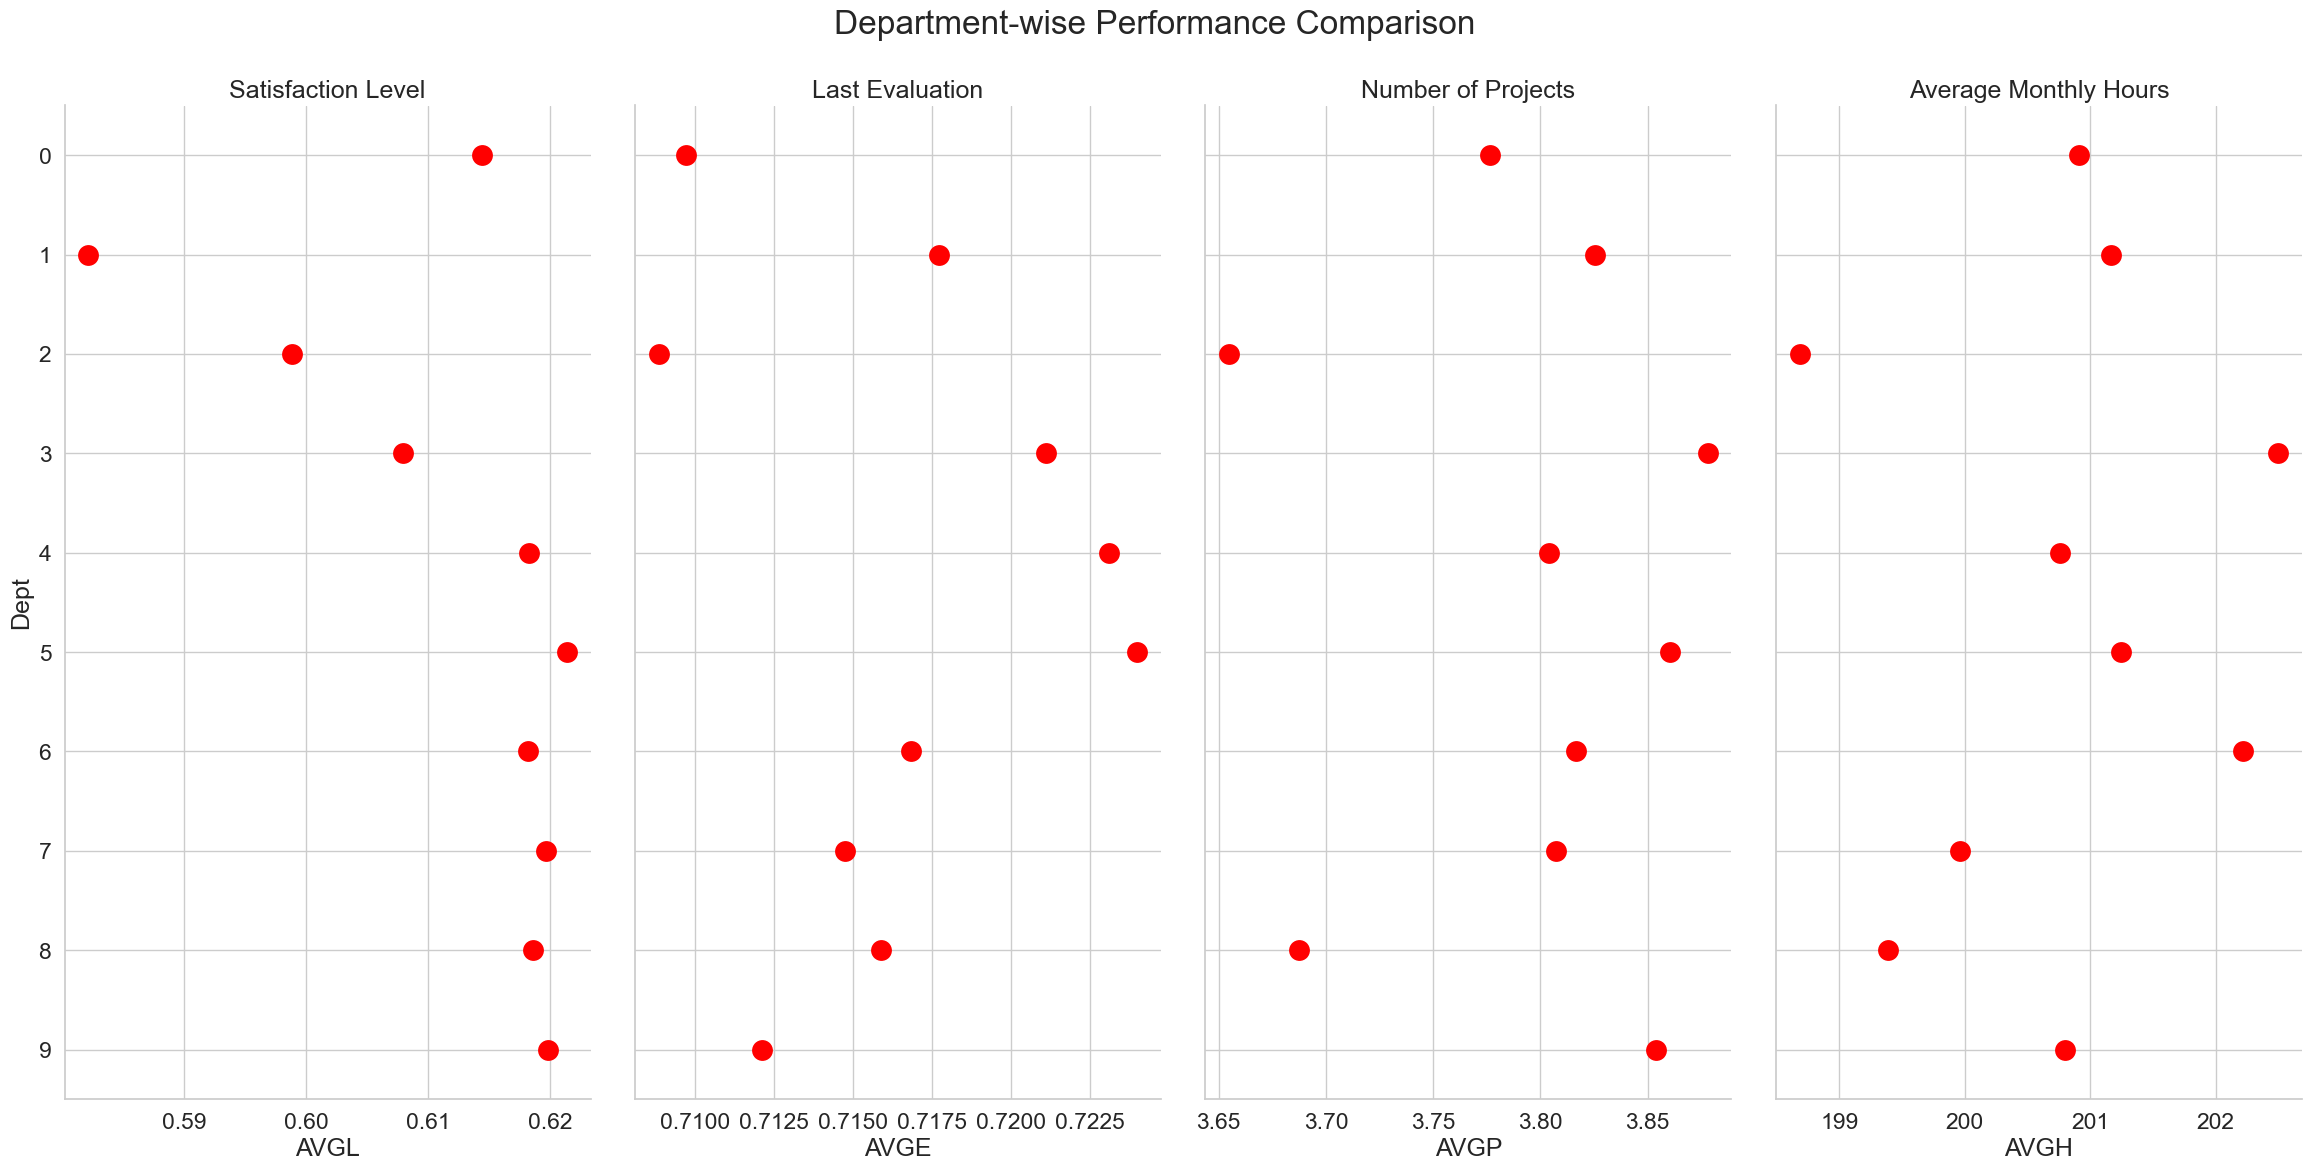

In [39]:


# Set style
sns.set(style="whitegrid", font_scale=1.5)

# Reordered columns to match titles
columns = ['AVGL', 'AVGE', 'AVGP', 'AVGH']
titles = ['Satisfaction Level', 'Last Evaluation', 'Number of Projects', 'Average Monthly Hours']

# Create PairGrid
p = sns.PairGrid(avg.sort_values('AVGL', ascending=False), 
                 y_vars='Dept', x_vars=columns, height=12, aspect=0.5)

# Map stripplot (you can adjust size/color here)
p.map(sns.stripplot, orient='h', palette="Reds_r", size=15, color="red")

# Set titles and grid lines
for ax, title in zip(p.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

# Tight layout and show
plt.subplots_adjust(top=0.9)
p.fig.suptitle('Department-wise Performance Comparison', fontsize=24)
plt.show()


From the above plot,we summarize that the management department succeeds in satisfying its employees.The management department achieved a score higher than the mean value in all the above mentined features.

Now we apply the same strategy in the case of left employees.

In [40]:
# Filter data for employees who left
dsa = data[data['left'] == 1]

# Define x variables
x_var = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours']
dept = data['Department'].unique()

# Empty lists to store department-wise means
lavgl = []
lavge = []
lavgp = []
lavgh = []

for i in dept:
    lavgl.append(dsa['satisfaction_level'][dsa['Department'] == i].mean())
    lavge.append(dsa['last_evaluation'][dsa['Department'] == i].mean())
    lavgp.append(dsa['number_project'][dsa['Department'] == i].mean())
    lavgh.append(dsa['average_monthly_hours'][dsa['Department'] == i].mean())


In [41]:
Lavg = pd.DataFrame({
    'Dept': dept,
    'AVGL': lavgl,
    'AVGE': lavge,
    'AVGP': lavgp,
    'AVGH': lavgh
})


In [42]:
Lavg

,Dept,AVGL,AVGE,AVGP,AVGH
0,0,0.447663,0.711243,3.736686,205.041420
1,1,0.402598,0.694510,3.872549,207.029412
2,2,0.433395,0.679721,3.539535,197.306977
3,3,0.432525,0.734132,4.061693,214.183644
4,4,0.450901,0.727315,3.864865,205.636036
5,5,0.422857,0.727253,4.142857,207.263736
6,6,0.411868,0.730037,4.025641,213.849817
7,7,0.481566,0.726566,3.848485,207.787879
8,8,0.453153,0.692020,3.581281,200.990148
9,9,0.432810,0.745372,4.024793,210.975207


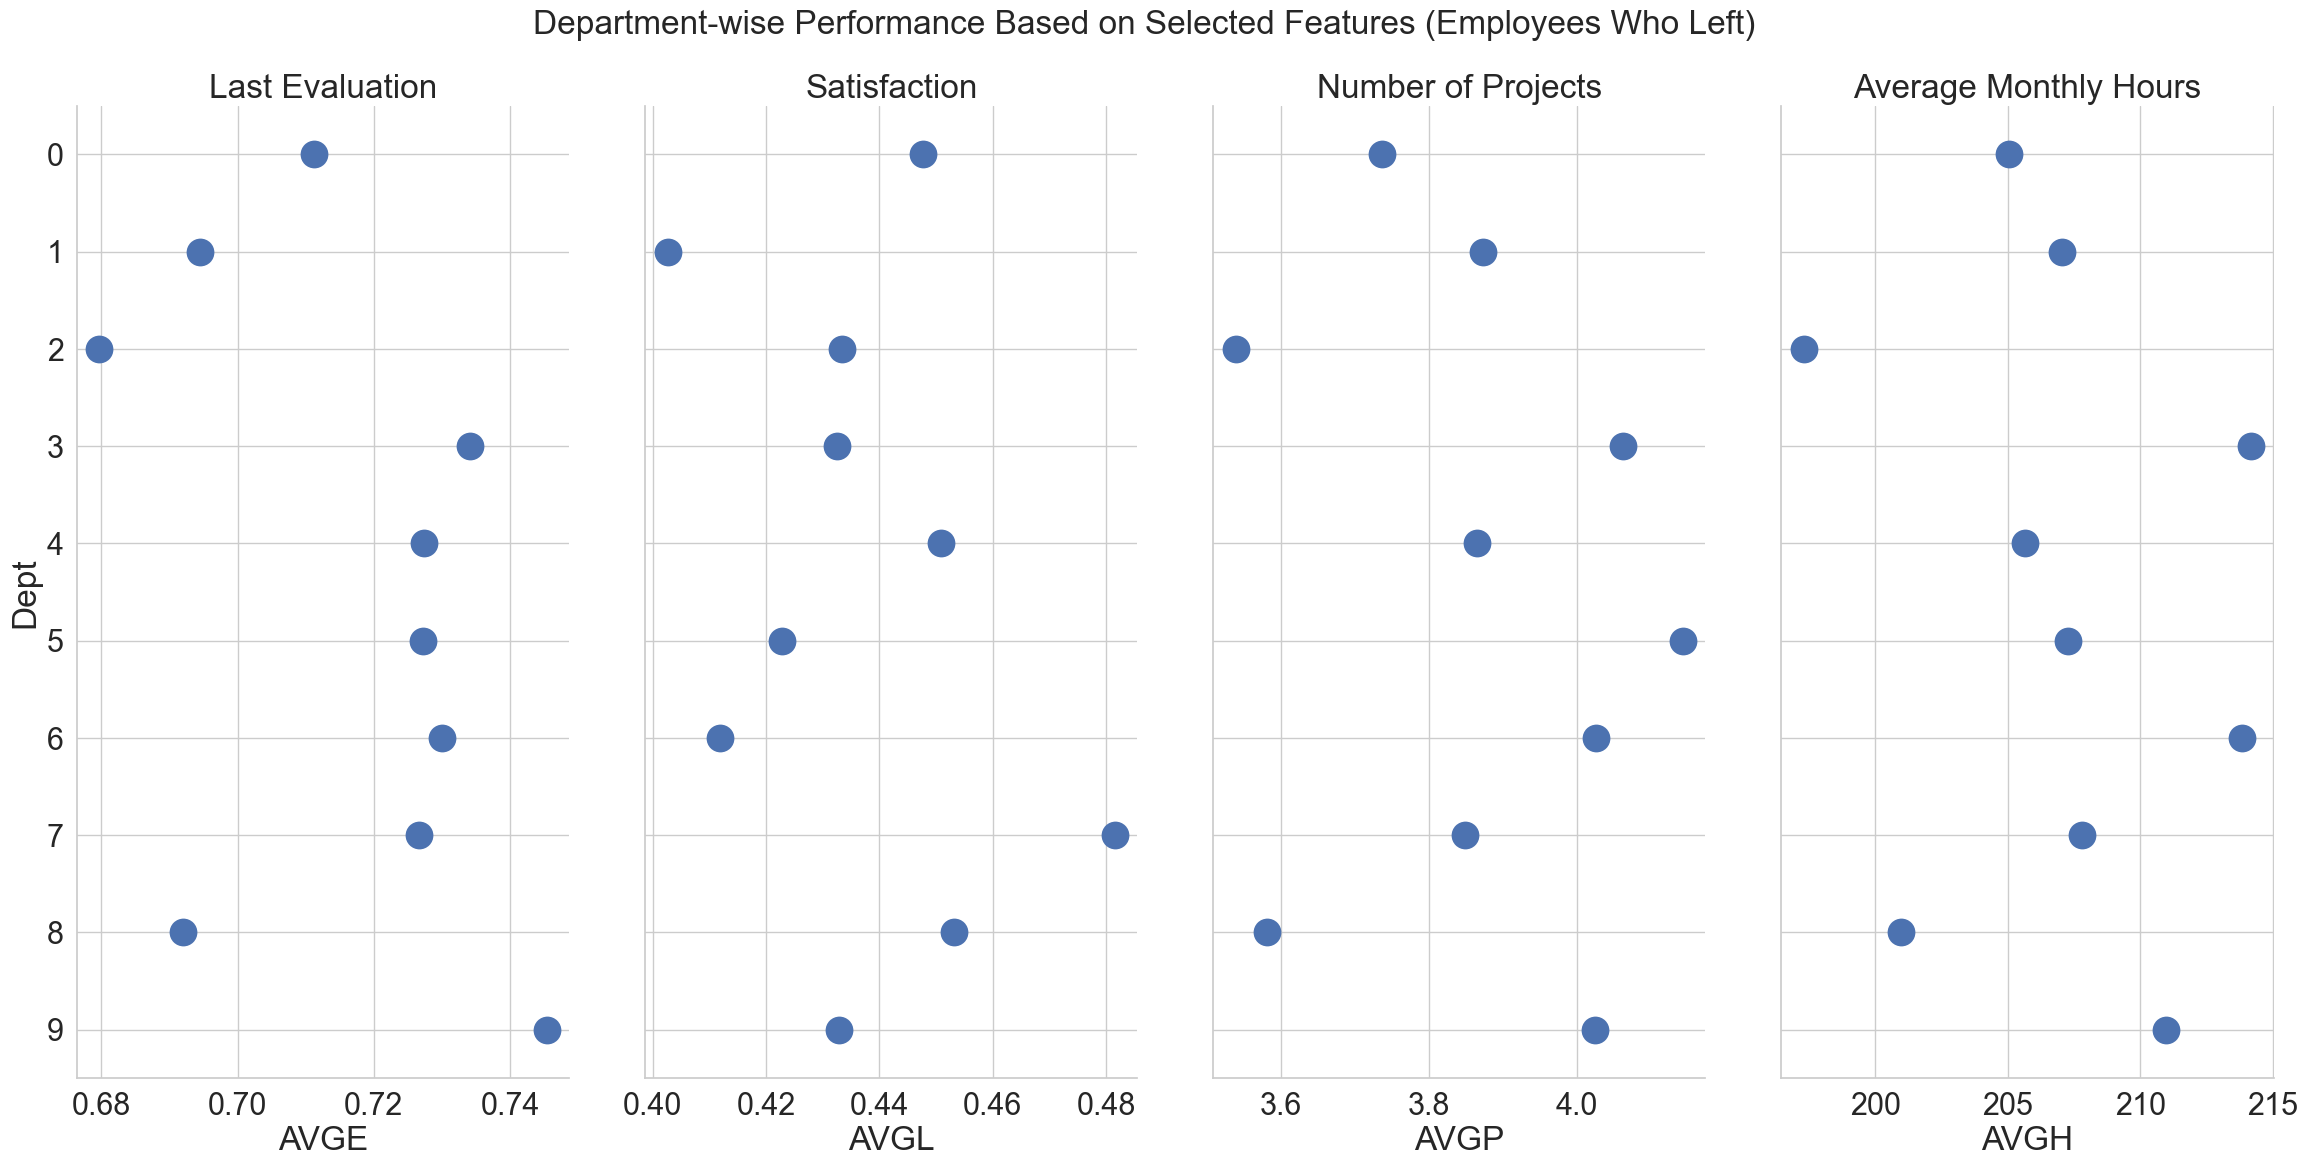

In [43]:


sns.set(style="whitegrid", font_scale=2)

# Reordered variables and matched titles
columns = ['AVGE', 'AVGL', 'AVGP', 'AVGH']
titles = ["Last Evaluation", "Satisfaction", "Number of Projects", "Average Monthly Hours"]

# Create PairGrid
lp = sns.PairGrid(Lavg.sort_values('AVGE', ascending=False), 
                  y_vars='Dept', x_vars=columns, 
                  height=12, aspect=0.5)

# Plot with stripplot (removed edgecolor)
lp.map(sns.stripplot, orient='h', palette="Reds_r", size=20)

# Set subplot titles and grid
for ax, title in zip(lp.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

# Set overall title
lp.fig.suptitle('Department-wise Performance Based on Selected Features (Employees Who Left)', fontsize=24)

# Adjust layout
plt.subplots_adjust(top=0.9)
plt.show()


Now,the above plot depicts that the department RanD has the highest attrition rate of employees who exhibited higher performance 

## Implementation

Lets dive into the most interesting portion of the project that is to predict the employees who has left the firm with the help of supervised machine learning algorithms.

## Pre-processing the data

Here we clean the data and make it ready for the model to fit and predict.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Separate features and target
features = data.drop(['left'], axis=1)
target = data['left']

# Initialize LabelEncoder
lb = LabelEncoder()

# Encode 'salary' and 'Department' columns
features['salary'] = lb.fit_transform(features['salary'])
features['Department'] = lb.fit_transform(features['Department'])


In [45]:
features

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,4,0
14995,0.37,0.48,2,160,3,0,0,4,0
14996,0.37,0.53,2,143,3,0,0,4,0
14997,0.11,0.96,6,280,4,0,0,4,0


In [46]:
features.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0


In [47]:
print(features[['salary', 'Department']].head())

   salary  Department
0       0           0
1       1           0
2       1           0
3       0           0
4       0           0


Now we implement the train_test_split to split the data into testing sets and training sets.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# Split the data with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Scale features to improve model performance
Xscale_train = pd.DataFrame(preprocessing.scale(X_train), columns=X_train.columns)
Xscale_test = pd.DataFrame(preprocessing.scale(X_test), columns=X_test.columns)


In [49]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
12896,0.73,0.62,4,247,4,0,0,0,0
12545,0.78,1.00,5,236,5,0,0,0,1
14833,0.10,0.55,2,247,4,0,0,0,1
8335,0.59,0.51,2,126,3,0,0,0,1
2724,0.68,0.48,4,251,4,0,0,4,2


In [50]:
Xscale_train.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.474481,-0.562644,0.162568,0.921578,0.342509,-0.410587,-0.144975,-1.189494,-0.927319
1,0.675614,1.657633,0.973990,0.701313,1.028612,-0.410587,-0.144975,-1.189494,0.635448
2,-2.059790,-0.971642,-1.460274,0.921578,0.342509,-0.410587,-0.144975,-1.189494,0.635448
3,-0.088690,-1.205355,-1.460274,-1.501335,-0.343595,-0.410587,-0.144975,-1.189494,0.635448
4,0.273349,-1.380640,0.162568,1.001674,0.342509,-0.410587,-0.144975,0.232094,2.198214


## Model Testing and Training

Now,we start with designing our models and fitting the test dataset to the model and predicting a good accuracy.

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def parameters_tuning(model, X_train, y_train, X_test, y_test, metrics, param_grid, clf=False, conf=False):
    """
    Tune parameters of the model using GridSearchCV.

    Parameters:
    - model: estimator object
    - X_train, y_train: training data
    - X_test, y_test: testing data
    - metrics: scoring metric (e.g., 'roc_auc', 'accuracy')
    - param_grid: dict of hyperparameters to tune
    - clf: bool, whether to print classification report
    - conf: bool, whether to print confusion matrix
    """

    # Perform Grid Search
    gcv = GridSearchCV(model, param_grid=param_grid, scoring=metrics, cv=10)
    gcv.fit(X_train, y_train)

    # Predictions
    prediction = gcv.predict(X_test)

    # For models that support probability predictions
    if hasattr(gcv, "predict_proba"):
        prob = gcv.predict_proba(X_test)[:, 1]
        print("ROC AUC Score:", roc_auc_score(y_test, prob))
    else:
        prob = None
        print("ROC AUC not available (model doesn't support predict_proba).")

    # Optional reports
    if clf:
        print("\nClassification Report:\n", classification_report(y_test, prediction))
    if conf:
        print("\nConfusion Matrix:\n", confusion_matrix(y_test, prediction))

    # Best parameters
    print("\nBest Parameters Found:\n", gcv.best_params_)

    return gcv


After the implementation i.e.after the parameters tuning we observe a great hike in the prediction rate.

Now,I implement the Logistic Regression algorithm to predict the accuracy.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')  # 'liblinear' is great for small datasets

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Optional detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      2286
           1       0.63      0.37      0.47       714

    accuracy                           0.80      3000
   macro avg       0.73      0.65      0.67      3000
weighted avg       0.78      0.80      0.78      3000

Confusion Matrix:
 [[2130  156]
 [ 449  265]]


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Initialize and fit model
t = DecisionTreeClassifier(class_weight='balanced', random_state=2)
t.fit(X_train, y_train)

# Predict probabilities
t_prob = t.predict_proba(X_test)[:, 1]

# Evaluate with ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, t_prob))


ROC AUC Score: 0.977375989765985


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Instantiate and fit Random Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Get predicted probabilities (for ROC AUC)
rfc_prob = rfc.predict_proba(X_test)[:, 1]

# Print initial ROC AUC score
print("Initial ROC AUC Score:", roc_auc_score(y_test, rfc_prob))

# Define parameter grid for tuning
rfc_param = {'n_estimators': np.arange(5, 25, 10)}  # e.g., [5, 15]

# Call your tuning function (make sure it's defined earlier)
parameters_tuning(rfc, X_train, y_train, X_test, y_test, 'roc_auc', rfc_param, clf=True, conf=True)


Initial ROC AUC Score: 0.9919703664492919
ROC AUC Score: 0.9890218992233815

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Confusion Matrix:
 [[2282    4]
 [  25  689]]

Best Parameters Found:
 {'n_estimators': np.int64(15)}


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': array([ 5, 15])}, scoring='roc_auc')

In [55]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
12896,0.73,0.62,4,247,4,0,0,0,0
12545,0.78,1.00,5,236,5,0,0,0,1
14833,0.10,0.55,2,247,4,0,0,0,1
8335,0.59,0.51,2,126,3,0,0,0,1
2724,0.68,0.48,4,251,4,0,0,4,2


In [56]:
features.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1


In [57]:
features['salary'].value_counts()

salary
0    7316
1    6446
2    1237
Name: count, dtype: int64

In [58]:
target.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [59]:
import pickle

# Save the model
pickle.dump(rfc, open('final_prediction.pkl', 'wb'))


In [60]:
print(features.columns.tolist())

['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']


In [61]:
# Load the saved model
loaded_model = pickle.load(open('final_prediction.pkl', 'rb'))

# Use it for prediction
loaded_model.predict(X_test)


# Replace with actual feature values (e.g., from one row of X_test)
# new_data =  [[0.7, 0.85, 3, 160, 3, 0, 0, 1, 2]]   # this will stay , left = 0
new_data =  [[0.1, 0.9, 6, 260, 4, 0, 1, 0, 0]]      # this will leave , left = 1 

# Predict
prediction = loaded_model.predict(new_data)

print("Prediction (0 = stay, 1 = left):", prediction)

# # Optionally show probability
# prob = model.predict_proba(new_data)[0][1]
# print(f"Probability of leaving: {prob:.2f}")

Prediction (0 = stay, 1 = left): [1]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
